## 匹配類型

\d : 任何数字

\D : 不是数字

\s : 任何 white space, 如 [\t\n\r\f\v]

\S : 不是 white space

\w : 任何大小写字母, 数字和 “” [a-zA-Z0-9]

\W : 不是 \w

\b : 空白字符 (只在某个字的开头或结尾)

\B : 空白字符 (不在某个字的开头或结尾)

\\ : 匹配 \

. : 匹配任何字符 (除了 \n)

^ : 匹配开头

$ : 匹配结尾

? : 前面的字符可有可无

## 跳脫字元

使用跳脫字元時，如果在''前面加個r，就會使\n 代表n，會變為真實字符

## Import Module 

In [1]:
import re

## re.search

與re.match不同，re.search可以搜尋string裡面的任一字，而re.match只能夠搜尋整體或者與首字母有連結的

### \w 
每次都只search到一個字

In [2]:
str = 'an example word:cat!!'
# 搜到'c' 'a' 't'
match = re.search(r'word:\w\w\w', str)
# If-statement after search() tests if it succeeded
if match:
    print('found', match.group())
else:
    print('did not find')

found word:cat


In [3]:
#因為只匹配三個，所以只會找到abc
match=re.search(r'\w\w\w','@@abcd!!')
print(match.group())

abc


### 指定
要完全符合才會呈現出來

In [3]:
match = re.search(r'iii', 'piiig')
print(match.group())

iii


In [5]:
match = re.search(r'igs', 'piiig')
print(match)

None


### .
匹配任何字符

In [7]:
#用兩個'.',所以會匹配g的前面兩個i
match=re.search(r'..g','piiig')
print(match.group())

iig


### \d 
匹配任何數字

In [9]:
match=re.search(r'\d\d\d','p123g')
print(match.group())

123


In [10]:
match=re.search(r'\w\w\w','@@abcd!!')
print(match.group())

abc


### +
匹配前一個字符一次或無限次

In [12]:
# i+ = one or more i's, as many as possible.
match=re.search(r'pi+','piiig')
print(match.group())

piii


In [14]:
'''
如果i+到不同的字，就會停止
'''
# Finds the first/leftmost solution, and within it drives the +
# as far as possible (aka 'leftmost and largest').
# In this example, note that it does not get to the second set of i's.
match=re.search(r'i+','piigiii')
print(match.group())

ii


### *
匹配前一個字符0次或無限次

In [6]:
#\s 匹配white space
match=re.search(r'\d\s*\d\s*\d','xx1 2   3xx')
print(match.group())

1 2   3


In [17]:
match=re.search(r'\d\s*\d\s*\d','xx12 3xx')
print(match.group())

12 3


In [18]:
match=re.search(r'\d\s*\d\s*\d','xx123xx')
print(match.group())

123


### ^
匹配字符串開頭

In [21]:
## ^ = matches the start of string, so this fails:
match=re.search(r'^b\w+','foobar')
print(match)
## but without the ^ it succeeds:
match=re.search(r'b\w+','foobar')
print(match.group())

None
bar


### [ ]

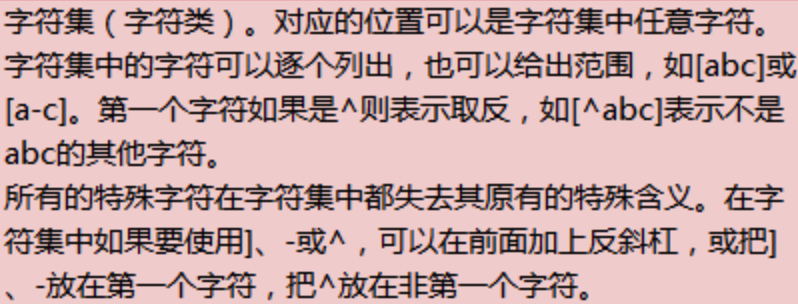

In [22]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'\w+@\w+', str)
if match:
    print(match.group())

b@google


In [25]:
#Square brackets can be used to indicate a set of chars
match=re.search(r'[\w.-]+@+[\w.-]+',str)
if match:
    print(match.group())

alice-b@google.com


### ( ) 
To do this, add parenthesis ( ) around the username and host in the pattern, like this: r'([\w.-]+)@([\w.-]+)'. In this case, the parenthesis do not change what the pattern will match, instead they establish logical "groups" inside of the match text. 

()用括號標出第一個group

In [26]:
str='purple alice-b@google.com monkey dishwasher'
match=re.search(r'([\w.-]+)@([\w.-]+)',str)
if match:
    print(match.group())
    print(match.group(1))
    print(match.group(2))

alice-b@google.com
alice-b
google.com


## findall 
Return a list of all non-overlapping matches in the string.

In [13]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

emails=re.findall(r'[\w]+@[\w.]+',str)
for email in emails:
    print(email)

alice@google.com
bob@abc.com


Sometimes you have paren ( ) groupings in the pattern, but which you do not want to extract. In that case, write the parens with a ?: at the start, e.g. (?: ) and that left paren will not count as a group result.)

In [40]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
tuples=re.findall(r'([\w.-]+)@([\w.-]+)',str)
print(tuples)
for tuple in tuples:
    print(tuple[0])
    print(tuple[1])

[('alice', 'google.com'), ('bob', 'abc.com')]
alice
google.com
bob
abc.com


In [7]:
my_string="Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

#找到大寫開頭的單字
print(re.findall(r'[A-Z]\w+',my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


## Substitution (optional)
The re.sub(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them. The replacement string can include '\1', '\2' which refer to the text from group(1), group(2), and so on from the original matching text. 

In [15]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
# re.sub(pat, replacement, str) -- returns new string with all replacements,
""" 
\1 is group(1), \2 group(2) in the replacement
\1 指的是group(1) \2 指的是group(2) 後面放新加的
 """
print(re.sub(r'([\w\s\.-])+@([\w\s\.-]+)',r'\1加油@yo-yo-yo--dyne.com',str))

e加油@yo-yo-yo--dyne.com,b加油@yo-yo-yo--dyne.com


## re.split 
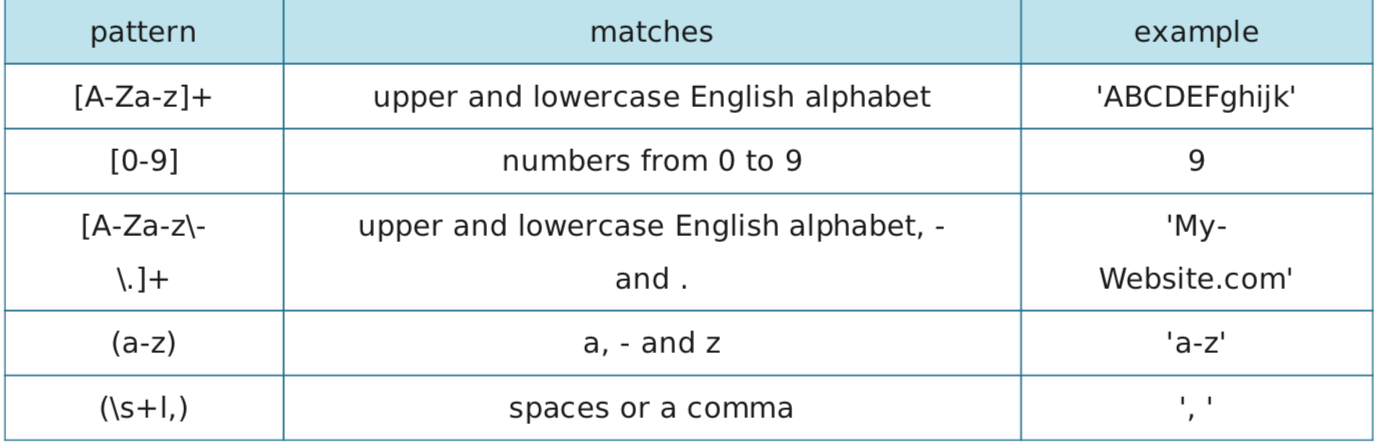

In [4]:
my_string="Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

#分隔\s 空白格
print(re.split(r'\s',my_string))

["Let's", 'write', 'RegEx!', '', "Won't", 'that', 'be', 'fun?', '', 'I', 'sure', 'think', 'so.', '', 'Can', 'you', 'find', '4', 'sentences?', '', 'Or', 'perhaps,', 'all', '19', 'words?']


In [5]:
#分隔[] 只要含有.?/就切。
#ending點
print(re.split(r'[.?/]',my_string))

["Let's write RegEx!  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']


## { }
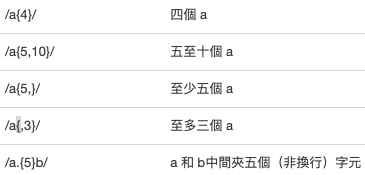